- y -> Whether the client has subscribed a term deposit or not 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.shape

(45211, 17)

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
df.replace("blue-collar",1,inplace=True)
df.replace("management",2,inplace=True)
df.replace("technician",3,inplace=True)
df.replace("admin.",4,inplace=True)
df.replace("services",5,inplace=True)
df.replace("retired",6,inplace=True)
df.replace("self-employed",7,inplace=True)
df.replace("entrepreneur",8,inplace=True)
df.replace("unemployed",9,inplace=True)
df.replace("housemaid",10,inplace=True)
df.replace("student",11,inplace=True)
df.replace("unknown",0,inplace=True)

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,married,tertiary,no,2143,yes,no,0,5,may,261,1,-1,0,0,no
1,44,3,single,secondary,no,29,yes,no,0,5,may,151,1,-1,0,0,no
2,33,8,married,secondary,no,2,yes,yes,0,5,may,76,1,-1,0,0,no
3,47,1,married,0,no,1506,yes,no,0,5,may,92,1,-1,0,0,no
4,33,0,single,0,no,1,no,no,0,5,may,198,1,-1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,0,yes
45207,71,6,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,0,yes
45208,72,6,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,1,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0,no


In [10]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [11]:
df.replace("married",1,inplace=True)
df.replace("single",2,inplace=True)
df.replace("divorced",3,inplace=True)

In [12]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
0             1857
Name: education, dtype: int64

In [13]:
df.replace("secondary",1,inplace=True)
df.replace("tertiary",2,inplace=True)
df.replace("primary",3,inplace=True)

In [14]:
df.replace("yes",1,inplace=True)
df.replace("no",0,inplace=True)

In [15]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,2,0,2143,1,0,0,5,may,261,1,-1,0,0,0
1,44,3,2,1,0,29,1,0,0,5,may,151,1,-1,0,0,0
2,33,8,1,1,0,2,1,1,0,5,may,76,1,-1,0,0,0
3,47,1,1,0,0,1506,1,0,0,5,may,92,1,-1,0,0,0
4,33,0,2,0,0,1,0,0,0,5,may,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,0,825,0,0,cellular,17,nov,977,3,-1,0,0,1
45207,71,6,3,3,0,1729,0,0,cellular,17,nov,456,2,-1,0,0,1
45208,72,6,1,1,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,1,1,1,0,668,0,0,telephone,17,nov,508,4,-1,0,0,0


In [16]:
df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [17]:
df.replace("may",1,inplace=True)
df.replace("jul",2,inplace=True)
df.replace("aug",3,inplace=True)
df.replace("jun",4,inplace=True)
df.replace("nov",5,inplace=True)
df.replace("apr",6,inplace=True)
df.replace("feb",7,inplace=True)
df.replace("jan",8,inplace=True)
df.replace("oct",9,inplace=True)
df.replace("sep",10,inplace=True)
df.replace("mar",11,inplace=True)
df.replace("dec",12,inplace=True)

In [18]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,2,0,2143,1,0,0,5,1,261,1,-1,0,0,0
1,44,3,2,1,0,29,1,0,0,5,1,151,1,-1,0,0,0
2,33,8,1,1,0,2,1,1,0,5,1,76,1,-1,0,0,0
3,47,1,1,0,0,1506,1,0,0,5,1,92,1,-1,0,0,0
4,33,0,2,0,0,1,0,0,0,5,1,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,0,825,0,0,cellular,17,5,977,3,-1,0,0,1
45207,71,6,3,3,0,1729,0,0,cellular,17,5,456,2,-1,0,0,1
45208,72,6,1,1,0,5715,0,0,cellular,17,5,1127,5,184,3,success,1
45209,57,1,1,1,0,668,0,0,telephone,17,5,508,4,-1,0,0,0


In [19]:
df.contact.value_counts()

cellular     29285
0            13020
telephone     2906
Name: contact, dtype: int64

In [20]:
df.replace("cellular",1,inplace=True)
df.replace("telephone",2,inplace=True)

In [21]:
df.poutcome.value_counts()

0          36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [22]:
df.replace("failure",1,inplace=True)
df.replace("other",2,inplace=True)
df.replace("success",3,inplace=True)

In [23]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,2,0,2143,1,0,0,5,1,261,1,-1,0,0,0
1,44,3,2,1,0,29,1,0,0,5,1,151,1,-1,0,0,0
2,33,8,1,1,0,2,1,1,0,5,1,76,1,-1,0,0,0
3,47,1,1,0,0,1506,1,0,0,5,1,92,1,-1,0,0,0
4,33,0,2,0,0,1,0,0,0,5,1,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,0,825,0,0,1,17,5,977,3,-1,0,0,1
45207,71,6,3,3,0,1729,0,0,1,17,5,456,2,-1,0,0,1
45208,72,6,1,1,0,5715,0,0,1,17,5,1127,5,184,3,3,1
45209,57,1,1,1,0,668,0,0,2,17,5,508,4,-1,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [25]:
# Splitting the data into training and testing set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = df.iloc[:,0:16]
y = df["y"]

In [28]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,2,1,2,0,2143,1,0,0,5,1,261,1,-1,0,0
1,44,3,2,1,0,29,1,0,0,5,1,151,1,-1,0,0
2,33,8,1,1,0,2,1,1,0,5,1,76,1,-1,0,0
3,47,1,1,0,0,1506,1,0,0,5,1,92,1,-1,0,0
4,33,0,2,0,0,1,0,0,0,5,1,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,0,825,0,0,1,17,5,977,3,-1,0,0
45207,71,6,3,3,0,1729,0,0,1,17,5,456,2,-1,0,0
45208,72,6,1,1,0,5715,0,0,1,17,5,1127,5,184,3,3
45209,57,1,1,1,0,668,0,0,2,17,5,508,4,-1,0,0


In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=1)

In [31]:
xtrain

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6149,32,1,1,1,1,-238,1,0,0,27,1,427,1,-1,0,0
12403,34,4,2,1,0,-478,1,1,0,27,4,111,4,-1,0,0
21645,32,3,1,1,0,266,1,0,1,19,3,168,2,-1,0,0
29580,36,1,1,1,1,13,0,1,1,3,7,150,4,-1,0,0
31245,23,11,2,1,0,486,0,0,1,3,11,87,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,50,3,1,2,0,1830,0,0,1,14,1,318,3,-1,0,0
32511,34,2,3,2,0,528,1,0,1,17,6,233,2,-1,0,0
5192,48,2,1,2,0,4191,0,0,0,21,1,363,6,-1,0,0
12172,45,4,1,0,0,1783,0,0,0,20,4,11,11,-1,0,0


In [32]:
ytrain

6149     0
12403    0
21645    0
29580    0
31245    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: y, Length: 31647, dtype: int64

In [33]:
# Model building

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lg = LogisticRegression()

In [36]:
# Train the model
lg.fit(xtrain,ytrain)

# Prediction
ypred = lg.predict(xtest)

C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
len(xtest)

13564

In [38]:
len(ypred)

13564

In [39]:
# Model Evaluation

In [40]:
print("Actual Y", ytest[:30].values)
print("Predict Y", ypred[:30])

Actual Y [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
Predict Y [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.54      0.21      0.30      1551

    accuracy                           0.89     13564
   macro avg       0.72      0.59      0.62     13564
weighted avg       0.86      0.89      0.87     13564



In [43]:
confusion_matrix(ytest,ypred)

array([[11740,   273],
       [ 1232,   319]], dtype=int64)

In [44]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.02891343, 0.09436925, 0.3949659 , ..., 0.02734873, 0.06336191,
       0.34595997])

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

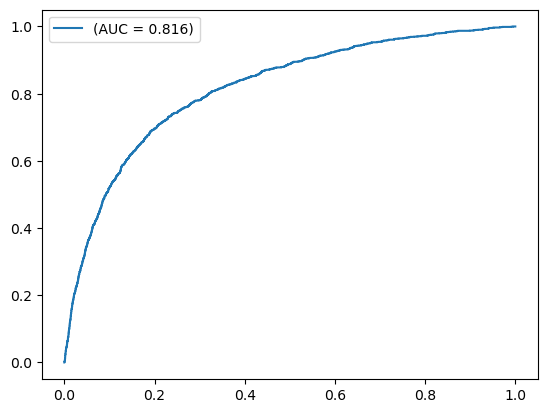

In [46]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.3f)'%auc)
plt.legend()